# KOSIS 암 검진 데이터 분석
## 1. 소계
KOSIS에서 제공해주는 연령, 성별 암검진 대상 및 수검현환에 대한 데이터의 분석과 시각화를 진행해본 프로젝트입니다.

## 2. 목표
EDA와 시각화

## 3. 사용 데이터 셋
[KOSIS 건강검진 통계 -> 암검진 -> 연령별 성별 암검진 대상 및 수검인원 현황](https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N010&conn_path=I2)

## 4. 구현

### 라이브러리

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 한글폰트 설정

In [30]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import os
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        os.system("apt-get install fonts-nanum -qq  > /dev/null")
        os.system("fc-cache -fv")

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### Data Load

In [2]:
df = pd.read_csv("data/kosis-cancer-raw.csv", encoding="cp949")
df.sample(5)

,연령별(1),시점,암검진별(1),성별(1),대상인원 (명),수검인원 (명)
1331,55 ~ 59세,2018,대장암,남자,1677732,578815
971,45 ~ 49세,2018,위암,합계,1570334,942193
931,45 ~ 49세,2015,자궁경부암,여자,787632,461445
701,40 ~ 44세,2012,간암,여자,65330,31125
340,30 ~ 34세,2011,계,합계,615279,254831


In [3]:
df.shape

(2428, 6)

### 컬럼 이름 바꿔주기

In [6]:
df = df.rename(columns={"연령별(1)":"연령별", "암검진별(1)":"암검진별", "성별(1)":"성별"}).copy()
df.sample(5)

,연령별,시점,암검진별,성별,대상인원 (명),수검인원 (명)
665,40 ~ 44세,2010,간암,여자,29728,15744
1365,60 ~ 64세,2010,위암,여자,564894,343419
1456,60 ~ 64세,2015,대장암,합계,2308221,968199
2136,80 ~ 84세,2013,간암,남자,5669,1867
151,계,2018,간암,합계,746363,533580


### 파생변수 생성

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연령별       2428 non-null   object
 1   시점        2428 non-null   int64 
 2   암검진별      2428 non-null   object
 3   성별        2428 non-null   object
 4   대상인원 (명)  2428 non-null   object
 5   수검인원 (명)  2428 non-null   object
dtypes: int64(1), object(5)
memory usage: 113.9+ KB


In [11]:
df["대상인원 (명)"].value_counts()[:3]

-         560
0          56
622102      4
Name: 대상인원 (명), dtype: int64

In [13]:
df["대상인원"] = df["대상인원 (명)"].replace("-", 0).astype(int)
df["수검인원"] = df["수검인원 (명)"].replace("-", 0).astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연령별       2428 non-null   object
 1   시점        2428 non-null   int64 
 2   암검진별      2428 non-null   object
 3   성별        2428 non-null   object
 4   대상인원 (명)  2428 non-null   object
 5   수검인원 (명)  2428 non-null   object
 6   대상인원      2428 non-null   int32 
 7   수검인원      2428 non-null   int32 
dtypes: int32(2), int64(1), object(5)
memory usage: 132.9+ KB


### 사용하지 않는 데이터 제거

In [16]:
df = df.drop(df[(df["연령별"]=="계") | (df["암검진별"]=="계") | (df["성별"]=="합계")].index).reset_index(drop=True).copy()
df.sample(5)

,연령별,시점,암검진별,성별,대상인원 (명),수검인원 (명),대상인원,수검인원
138,30 ~ 34세,2016,유방암,여자,-,-,0,0
572,55 ~ 59세,2012,위암,남자,627522,329496,627522,329496
965,75 ~ 79세,2012,위암,여자,236755,112939,236755,112939
1072,80 ~ 84세,2013,위암,남자,110984,45147,110984,45147
174,35 ~ 39세,2010,대장암,여자,-,-,0,0


### 고유값 확인

In [18]:
df.nunique()

연령별          14
시점           10
암검진별          5
성별            2
대상인원 (명)    789
수검인원 (명)    789
대상인원        788
수검인원        788
dtype: int64

### 파생변수 만들기

In [20]:
df["연령별"].unique()

array(['20 ~ 24세', '25 ~ 29세', '30 ~ 34세', '35 ~ 39세', '40 ~ 44세',
       '45 ~ 49세', '50 ~ 54세', '55 ~ 59세', '60 ~ 64세', '65 ~ 69세',
       '70 ~ 74세', '75 ~ 79세', '80 ~ 84세', '85세 이상'], dtype=object)

In [21]:
df["연령대"] = df["연령별"].str[0]+"0대"
df.sample(5)

,연령별,시점,암검진별,성별,대상인원 (명),수검인원 (명),대상인원,수검인원,연령대
333,40 ~ 44세,2017,간암,여자,41531,30471,41531,30471,40대
528,50 ~ 54세,2017,유방암,남자,-,-,0,0,50대
613,55 ~ 59세,2016,대장암,여자,1676782,603242,1676782,603242,50대
992,75 ~ 79세,2014,자궁경부암,남자,0,0,0,0,70대
807,65 ~ 69세,2016,위암,여자,429477,318689,429477,318689,60대


### 사용하지 않는 컬럼 제거

In [22]:
df = df.drop(columns=["대상인원 (명)", "수검인원 (명)"])
df.sample(5)

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
100,30 ~ 34세,2012,위암,남자,0,0,30대
6,20 ~ 24세,2016,유방암,남자,0,0,20대
585,55 ~ 59세,2013,대장암,여자,1412672,459468,50대
176,35 ~ 39세,2010,간암,여자,0,0,30대
901,70 ~ 74세,2015,간암,여자,28056,15686,70대


### 시각화

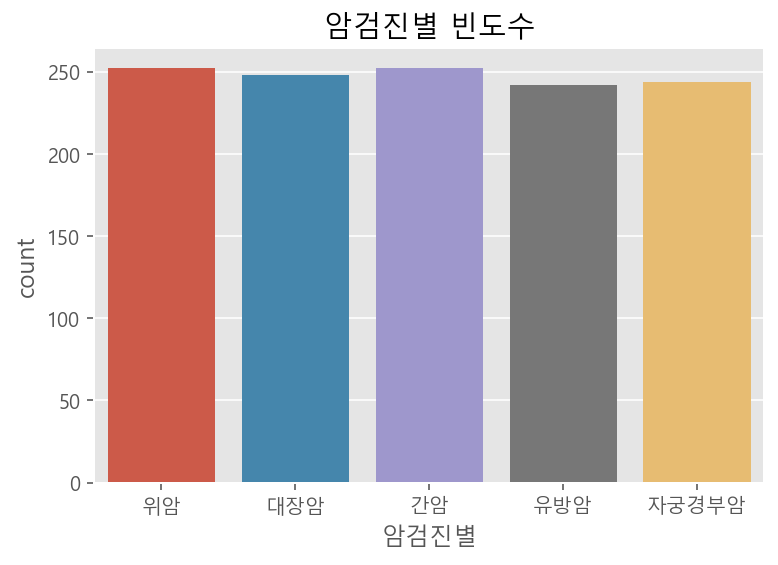

In [36]:
_ = sns.countplot(data=df, x="암검진별").set_title("암검진별 빈도수")

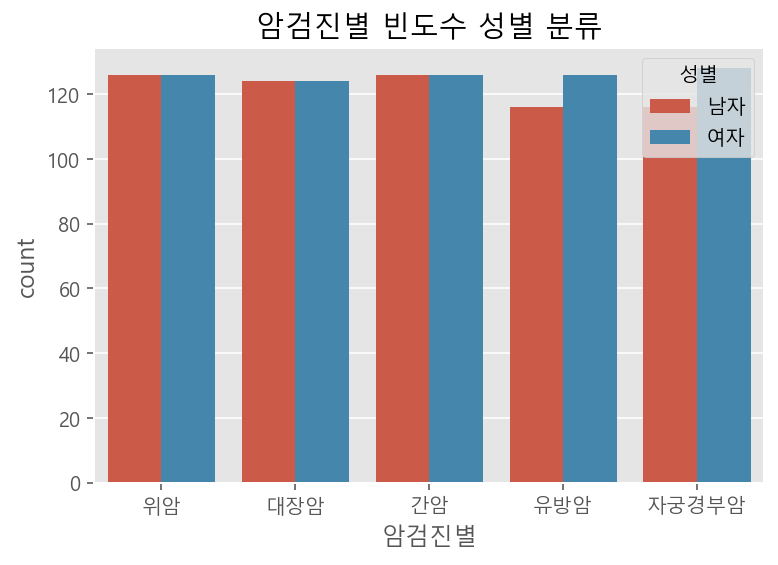

In [37]:
_ = sns.countplot(data=df, x="암검진별", hue="성별").set_title("암검진별 빈도수 성별 분류")

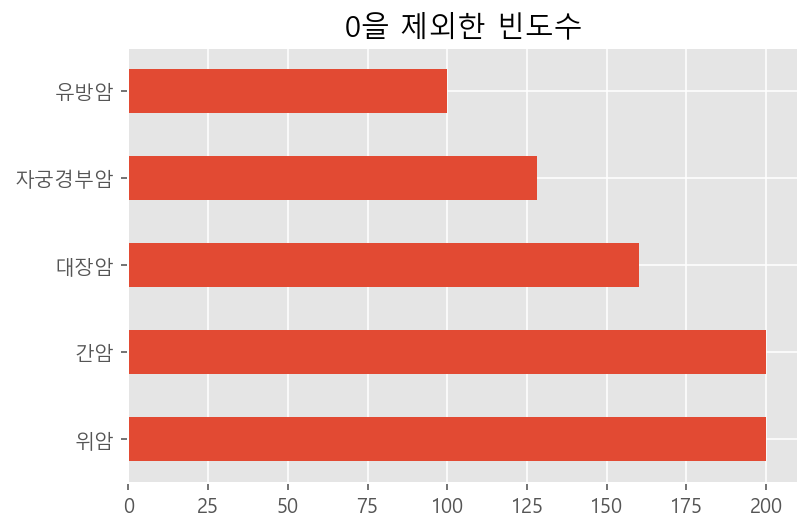

In [38]:
_ = df.loc[df["대상인원"]>0, "암검진별"].value_counts().plot.barh().set_title("0을 제외한 빈도수")

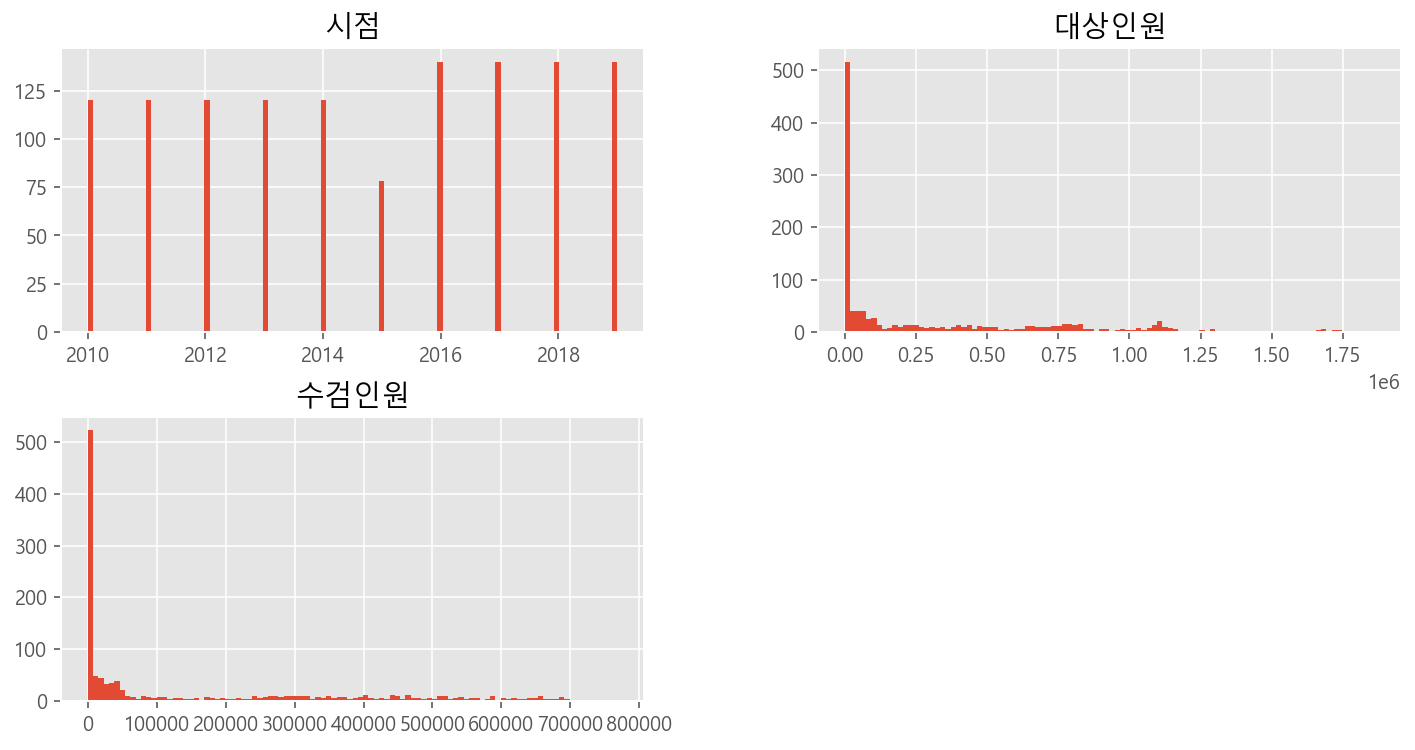

In [43]:
# 수치형 데이터
_ = df.hist(bins=100, figsize=(12, 6))

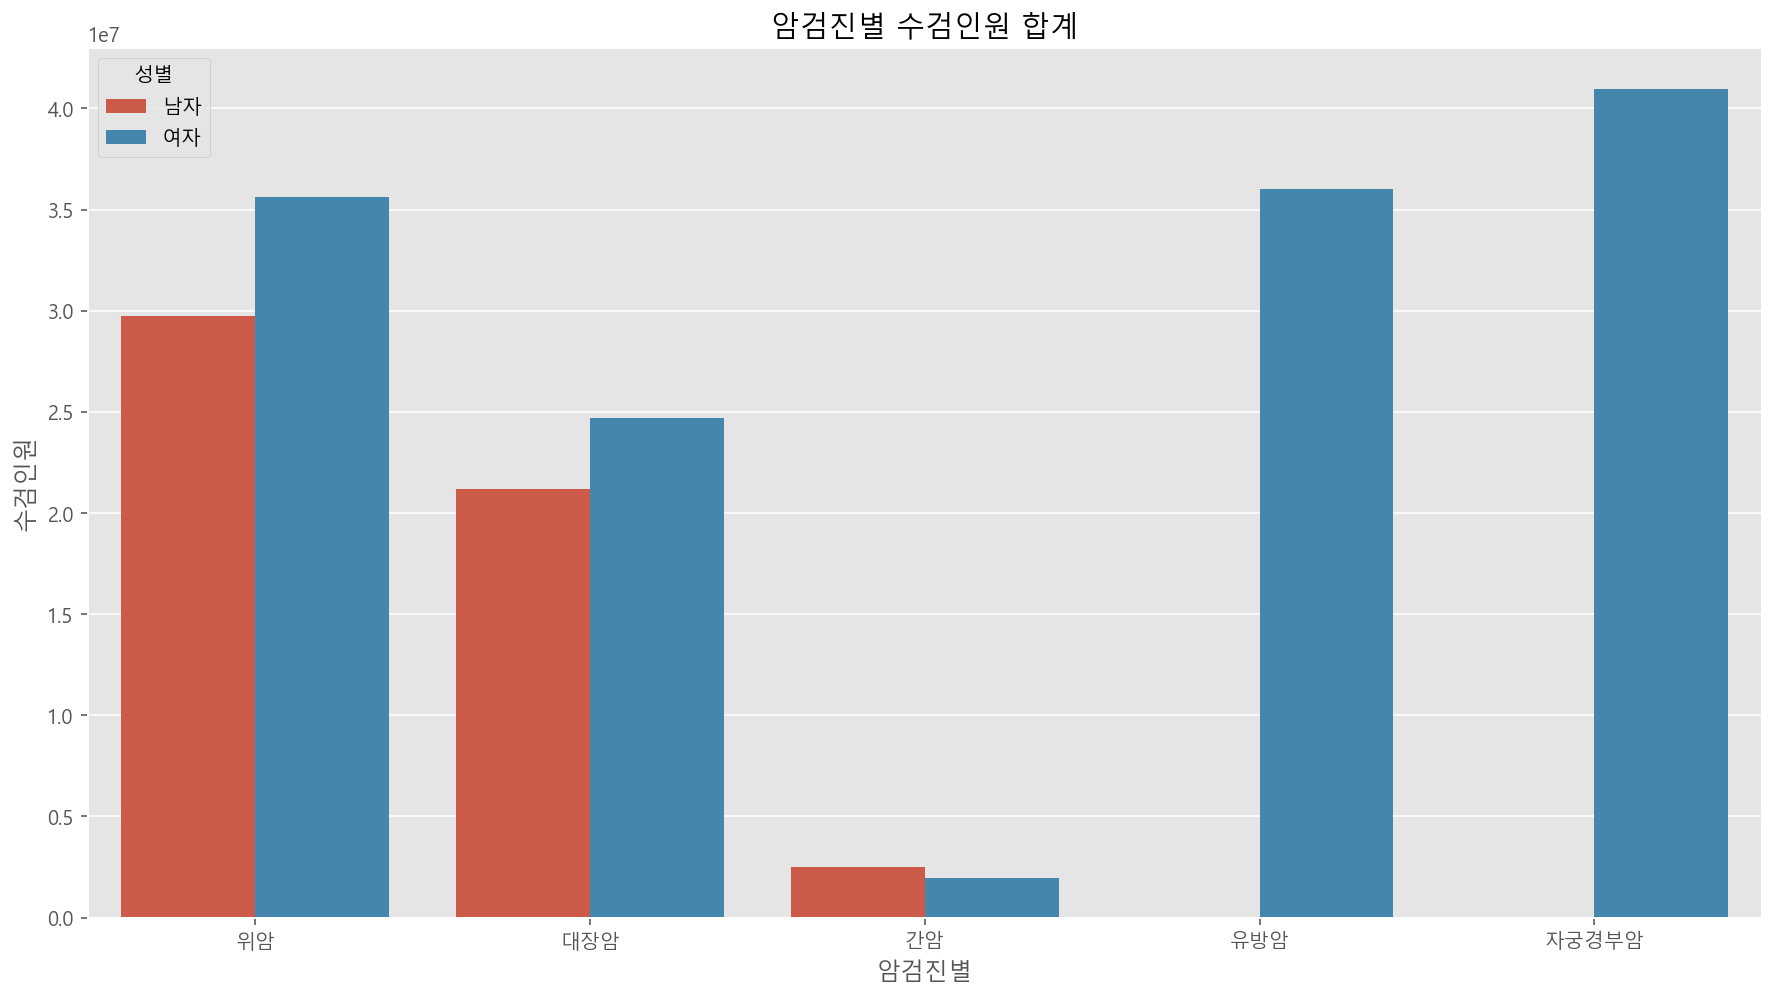

In [45]:
plt.figure(figsize=(15, 8))
_ = sns.barplot(data=df, x="암검진별", y="수검인원", hue="성별", ci=None, estimator=np.sum).set_title("암검진별 수검인원 합계")

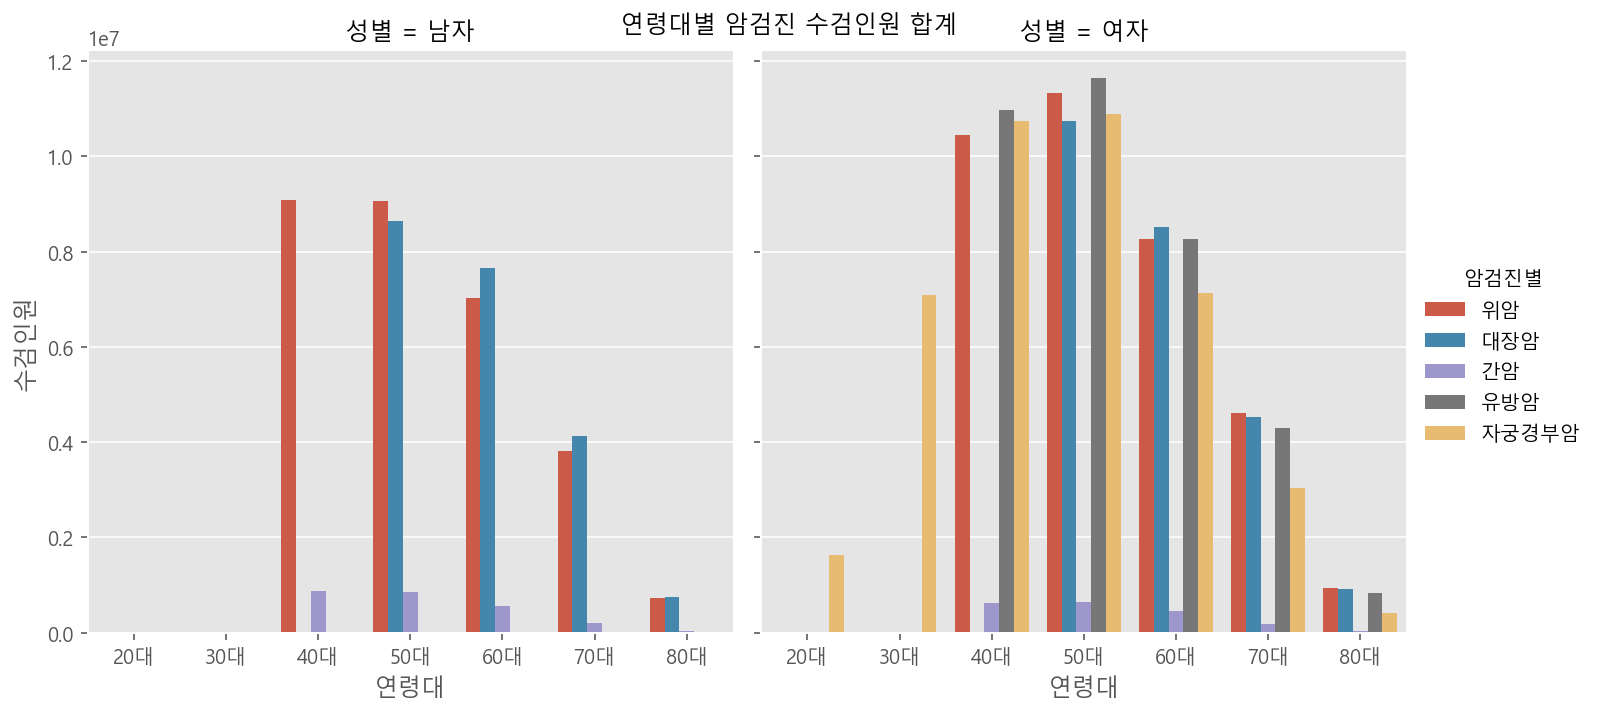

In [54]:
_ = sns.catplot(data=df, x="연령대", y="수검인원", hue="암검진별", col="성별", kind="bar", estimator=np.sum, ci=None).fig.suptitle("연령대별 암검진 수검인원 합계")

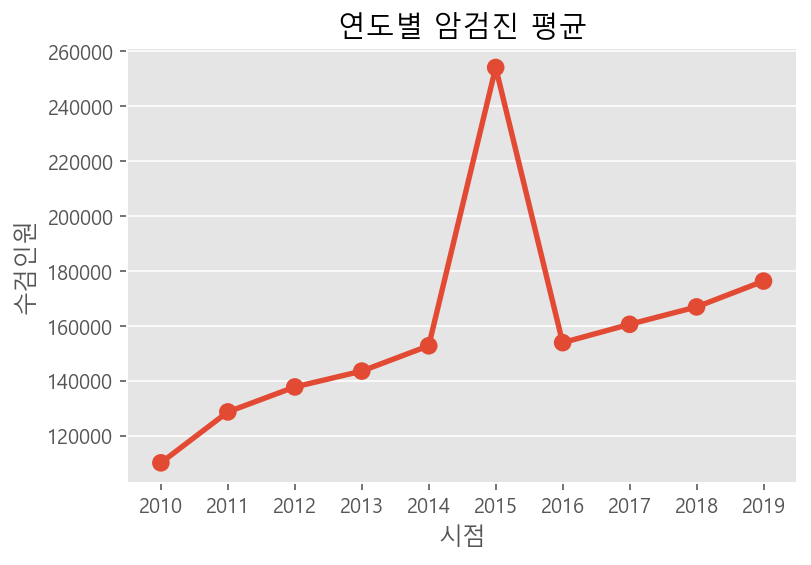

In [55]:
_ = sns.pointplot(data=df, x="시점", y="수검인원", ci=None).set_title("연도별 암검진 평균")

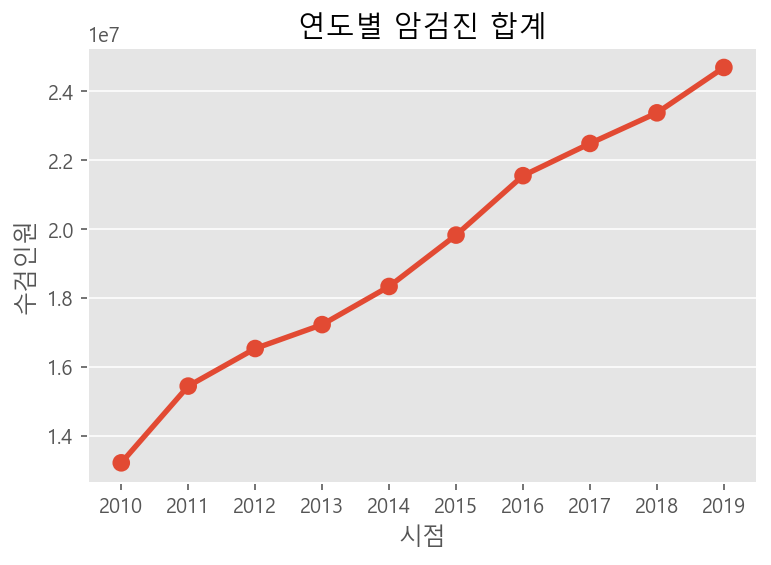

In [56]:
_ = sns.pointplot(data=df, x="시점", y="수검인원", ci=None, estimator=np.sum).set_title("연도별 암검진 합계")

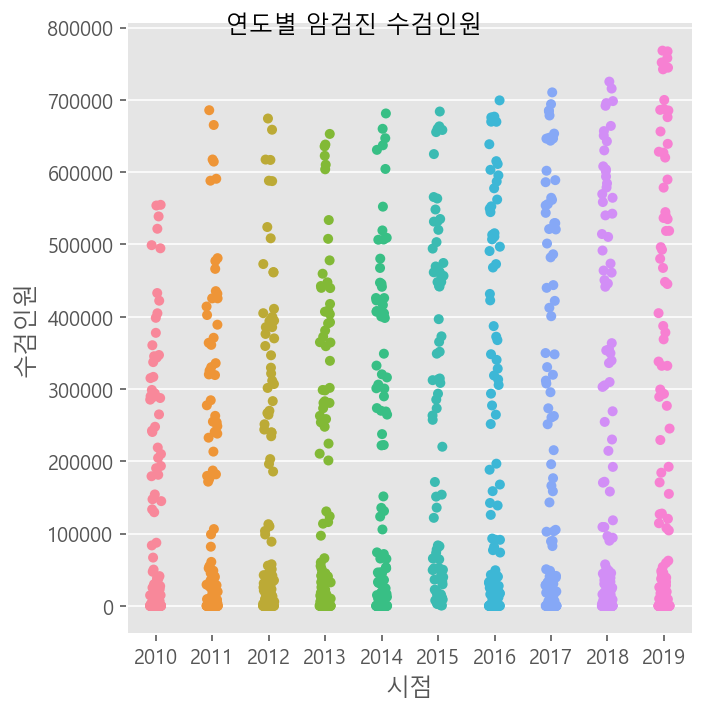

In [58]:
_ = sns.catplot(data=df, x="시점", y="수검인원").fig.suptitle("연도별 암검진 수검인원")

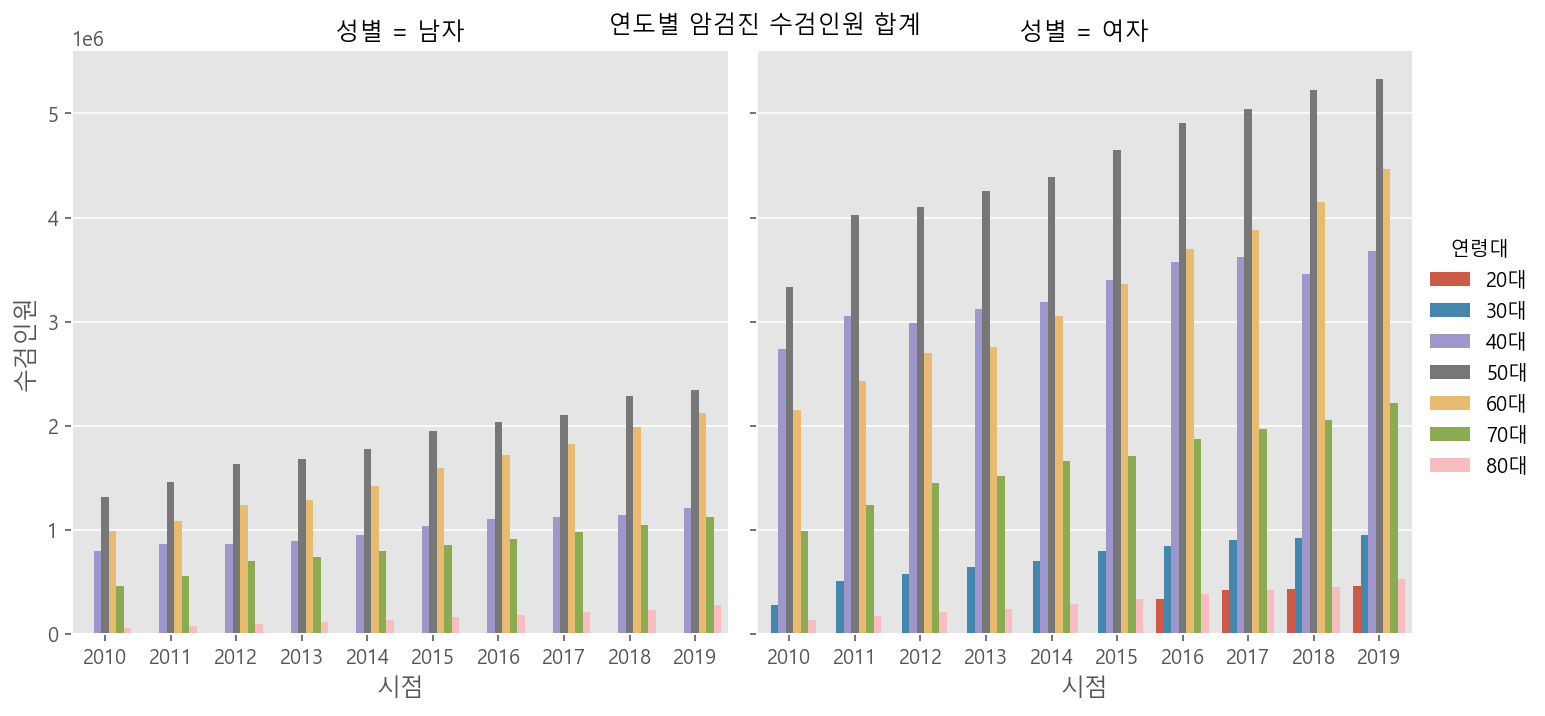

In [59]:
_ = sns.catplot(data=df, x="시점", y="수검인원", estimator=np.sum, kind="bar", ci=None, col="성별", hue="연령대").fig.suptitle("연도별 암검진 수검인원 합계")